In [9]:
from main import *

In [10]:
gw_no = 10
league_name = 'ifc'
league_id = get_league_id(league_name)

# Pre match
- captain
- transfers
- selected by %

In [ ]:
players = pd.read_csv('data/player_idlist.csv')

In [ ]:
players.loc[players.second_name == 'Haaland']

,first_name,second_name,id
450,Erling,Haaland,355


In [11]:
picks = get_gw_picks(league_id, gw_no)

In [12]:
picks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   element          225 non-null    int64
 1   position         225 non-null    int64
 2   multiplier       225 non-null    int64
 3   is_captain       225 non-null    bool 
 4   is_vice_captain  225 non-null    bool 
 5   manager_id       225 non-null    int64
dtypes: bool(2), int64(4)
memory usage: 7.6 KB


In [13]:
picks

,element,position,multiplier,is_captain,is_vice_captain,manager_id
0,524,1,1,False,False,5062593
1,407,2,1,False,False,5062593
2,36,3,1,False,False,5062593
3,178,4,1,False,False,5062593
4,308,5,2,True,False,5062593
...,...,...,...,...,...,...
220,433,11,1,False,False,7436807
221,275,12,0,False,False,7436807
222,14,13,0,False,False,7436807
223,341,14,0,False,False,7436807


In [14]:
picks.loc[picks.element == 355]

,element,position,multiplier,is_captain,is_vice_captain,manager_id
8,355,9,1,False,False,5062593
23,355,9,1,False,False,7078068
39,355,10,1,False,True,1189749
54,355,10,1,False,False,198741
69,355,10,1,False,False,6810096
85,355,11,1,False,False,68915
99,355,10,1,False,False,3668145
114,355,10,1,False,True,150903
129,355,10,1,False,False,2885660
145,355,11,1,False,False,3531461


## captains

In [6]:
captains = picks.loc[picks.is_captain == True, ['element', 'is_captain']].groupby('element').sum().reset_index()

In [7]:
captains.rename(columns={'is_captain': 'captained_by'}, inplace=True)

In [8]:
captains = captains.merge(players, left_on='element', right_on='id')

In [9]:
print('    Captain Picks')
captains.loc[:, ['first_name', 'second_name', 'captained_by']].sort_values(by='captained_by', ascending=False)

    Captain Picks


,first_name,second_name,captained_by
1,Mohamed,Salah,9
3,James,Maddison,2
0,Bukayo,Saka,1
2,Erling,Haaland,1
4,Son,Heung-min,1
5,Pedro,Lomba Neto,1


## picks

In [43]:
picks_count = picks.loc[picks.multiplier != 0, ['element']].value_counts().reset_index()

In [44]:
picks_count.rename(columns={0: 'selected_by'}, inplace=True)

In [45]:
picks_count = picks_count.merge(players, left_on='element', right_on='id')

In [46]:
print('    Top 10 Picks')
picks_count.loc[:, ['first_name', 'second_name', 'selected_by']].sort_values(by='selected_by', ascending = False).head(10)

    Top 10 Picks


,first_name,second_name,selected_by
0,Erling,Haaland,14
1,Mohamed,Salah,11
2,Alphonse,Areola,9
3,James,Maddison,9
4,Ollie,Watkins,8
5,Son,Heung-min,8
6,Kieran,Trippier,8
7,Kaoru,Mitoma,8
8,Dan,Burn,8
9,Bukayo,Saka,7


## transfers

# Post match

In [3]:
gw = get_gw_points(get_league_id(league_name), gw_no)

In [4]:
gw

,manager_id,team_name,name,gw_no,points,transfers_cost,h2h_points,rank
4,6810096,ethan hunt,nattanan lertpanyarote,10,76,0,76,1
6,3668145,EnerGY_ComeBaCK.EXE,Yuthakarn Phithaksung,10,80,4,76,1
5,68915,NoBias FC,Pattanun Yongvibulsiri,10,75,0,75,2
1,7078068,Norawich City,Norawit Hempornwisarn,10,73,0,73,3
9,3531461,kentwins,Thanpisit Manomaiphibul,10,73,0,73,3
10,7513640,Benchilloon,Thithat Tantiraksachai,10,69,0,69,4
0,5062593,team team team,Kongkrit D.,10,67,0,67,5
7,150903,Al-Ettifaq upon Tyne,Charlie Ryan,10,67,0,67,5
11,3659859,Shintwins,thitisan manomaiphibul,10,71,4,67,5
3,198741,-ngteam-,Tawiwut Charuwat,10,64,0,64,6


In [5]:
get_gw_weekly_pnl(gw, league_name)

,manager_id,team_name,name,gw_no,points,transfers_cost,h2h_points,rank,pnl
4,6810096,ethan hunt,nattanan lertpanyarote,10,76,0,76,1,150
6,3668145,EnerGY_ComeBaCK.EXE,Yuthakarn Phithaksung,10,80,4,76,1,150
13,4439385,Birdfever,Thanachai Kittichokwattana,10,59,0,59,8,-100
2,1189749,Mid-table blues,Pitcha Lertvinyu,10,62,4,58,9,-100
12,7016085,No Passion FC,phuket kumhangphon,10,52,0,52,10,-100


array([[<Axes: title={'center': 'h2h_points'}>]], dtype=object)

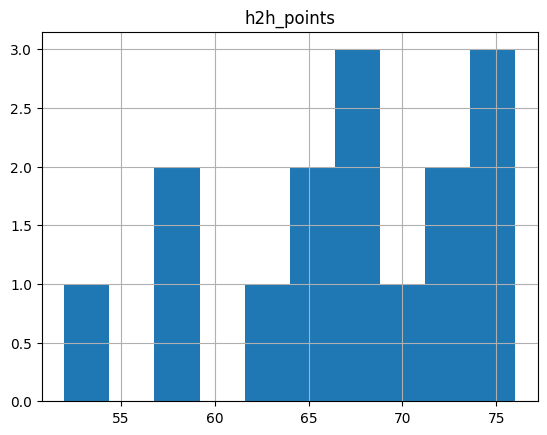

In [6]:
gw.hist(column='h2h_points')

<Axes: xlabel='h2h_points', ylabel='Count'>

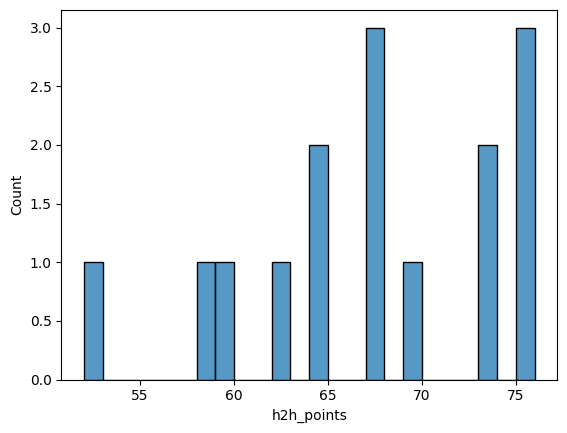

In [9]:
import seaborn as sns

sns.histplot(data=gw, x='h2h_points', binwidth=1)